# Harnessing Machine Learning to Optimize Future Energy Usage

## Objective

The objective of this project is to develop and train machine learning models that utilize historical energy usage data to predict future energy consumption patterns accurately. By leveraging these predictions, consumers will be empowered to make informed and strategic decisions that can significantly reduce operational costs while also minimizing the environmental impact associated with energy generation and consumption. 

In [1]:
# let's import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%config Inlinebackground.figureFormat='retina'
sns.set(font_scale=1.5)
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [2]:
# load energy data
energy_data = pd.read_csv(r'dataset/daily_dataset.csv', encoding='utf-8')

# load weather data
weather_data = pd.read_csv(r'dataset/weather_daily_darksky.csv', encoding='utf-8')

# demographic details
demographic_data = pd.read_csv(r'dataset/informations_households.csv', encoding='utf-8')

# holiday data
holiday_data = pd.read_csv(r'dataset/uk_bank_holidays.csv', encoding='utf-8')

In [4]:
energy_data.head(3)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064


In [5]:
weather_data.head(3)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10


In [6]:
demographic_data.head(3)

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0


In [7]:
holiday_data.head(3)

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday


In [8]:
energy_data.info() # basic descr.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 241.0+ MB


## Atrribute information

**Dependent variables**:  

    Day - day the energy usage measured
    Energy - average energy used
    
**Target variable**:               

    Energy - predict the average energy used

### Data Type      
**Object**

    - Day
    
**Numeric**   

    - Energy

### Feature category        
**Categorical**      

    - Day
    
**Continuous**     

    - Energy

# Exploratory Data Analysis

### Data Type      
**Object**

    - location
    
**Numeric**       
    - temp
    - clouds
    - pressure
    - rain
    - time stamp
    - humidity
    - wind

### Feature category        
**Categorical**       
    - location
    
**Continuous**     
    - temp
    - time stamp
    - clouds
    - pressure
    - rain
    - humidity
    - wind

In [9]:
# drop unnecessary features
energy_data = energy_data.drop(['energy_median', 'energy_max', 'energy_count', 'energy_std', 
                                'energy_sum', 'energy_min']
                               , axis=1)

In [10]:
energy_data['date'] = pd.to_datetime(energy_data['day'])
energy_data['year'] = energy_data['date'].dt.year
energy_data['month'] = energy_data['date'].dt.month_name()
energy_data['day'] = energy_data['date'].dt.day_name()

In [11]:
energy_data

,LCLid,day,energy_mean,date,year,month
0,MAC000131,Thursday,0.432045,2011-12-15,2011,December
1,MAC000131,Friday,0.296167,2011-12-16,2011,December
2,MAC000131,Saturday,0.189812,2011-12-17,2011,December
3,MAC000131,Sunday,0.218979,2011-12-18,2011,December
4,MAC000131,Monday,0.325979,2011-12-19,2011,December
...,...,...,...,...,...,...
3510428,MAC004977,Monday,0.118458,2014-02-24,2014,February
3510429,MAC004977,Tuesday,0.084208,2014-02-25,2014,February
3510430,MAC004977,Wednesday,0.120500,2014-02-26,2014,February
3510431,MAC004977,Thursday,0.114062,2014-02-27,2014,February


## Univariate Analysis

### Continuous variables

#### Energy

In [12]:
energy_data['energy_mean'].describe()

count    3.510403e+06
mean     2.117305e-01
std      1.908460e-01
min      0.000000e+00
25%      9.808333e-02
50%      1.632917e-01
75%      2.624583e-01
max      6.928250e+00
Name: energy_mean, dtype: float64

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 5.0)

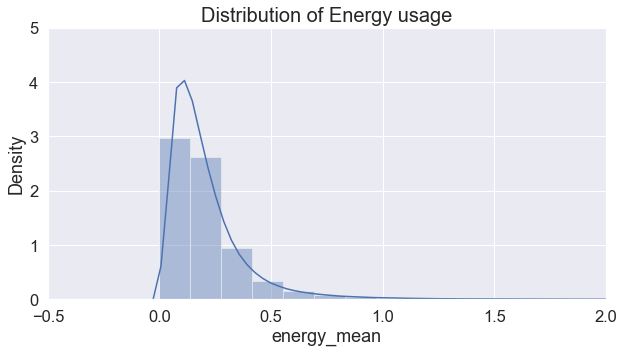

In [13]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
sns.distplot(energy_data['energy_mean'], ax=ax1, kde=True)
ax1.set_title('Distribution of Energy usage', fontsize=20)
ax1.set_xlim(-0.5, 2)
ax1.set_ylim(0, 5)

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-1.0, 1.5)

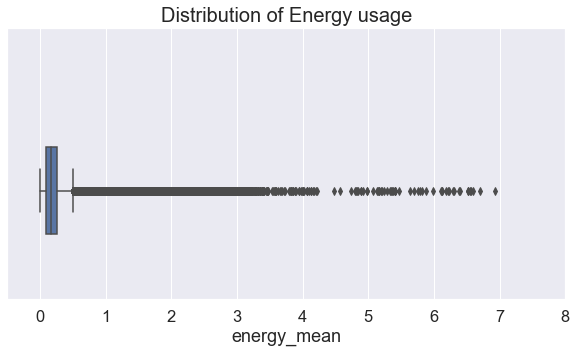

In [14]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
sns.boxplot(energy_data['energy_mean'], ax=ax1)
ax1.set_title('Distribution of Energy usage', fontsize=20)
ax1.set_xlim(-0.5, 8)
ax1.set_ylim(-1, 1.5)

**Outliers**       
These outliers are due to winter seasons. So, we decided to keep it.

In [15]:
energy_data[(energy_data['energy_mean'] > 3.5)].head(6)

,LCLid,day,energy_mean,date,year,month
122536,MAC005385,Sunday,3.880000,2014-01-19,2014,January
122576,MAC005385,Friday,4.004000,2014-02-28,2014,February
126964,MAC005422,Friday,3.828000,2014-02-28,2014,February
162312,MAC000034,Friday,5.690000,2014-02-28,2014,February
460474,MAC002670,Monday,4.820917,2012-11-12,2012,November
460475,MAC002670,Tuesday,6.304375,2012-11-13,2012,November


In [16]:
energy_data[(energy_data['energy_mean'] > 3.5)].groupby(by=['year', 'month']).mean().head(10)

energy_mean
year month                
2012 December     5.019919
     November     5.504765
     October      3.784948
2013 April        5.192438
     December     5.071772
     February     4.799250
     January      4.532667
     March        3.693733
     November     4.390600
     October      3.568896

### Categorical variables

#### Year

In [17]:
energy_data['year'].value_counts() # frequency count

2013    1940231
2012    1263580
2014     298099
2011       8523
Name: year, dtype: int64

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of Data from each year')

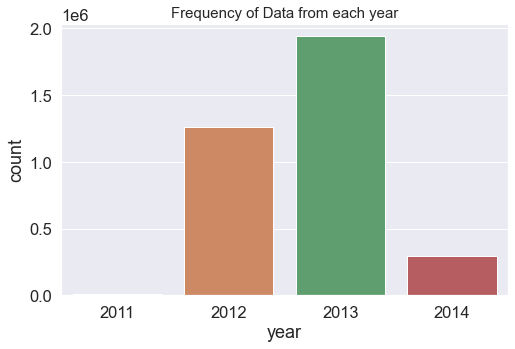

In [18]:
plt.figure(figsize=(8,5))
sns.countplot('year', data=energy_data)
plt.title('Frequency of Data from each year', fontsize=15)

#### Month

In [19]:
energy_data['month'].value_counts() # frequency count

January      342675
December     337878
October      325702
November     321297
February     314848
August       310945
July         307947
September    302240
June         279965
May          256900
April        209774
March        200262
Name: month, dtype: int64

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of Data from each month')

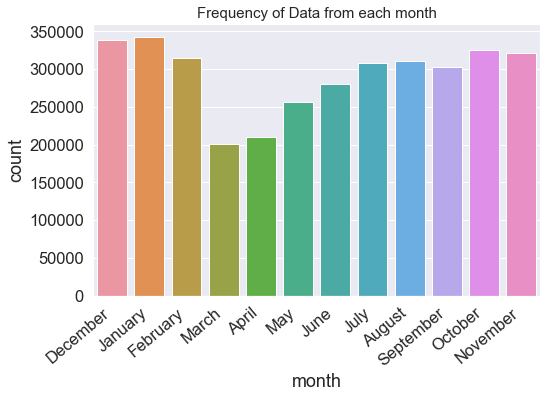

In [20]:
plt.figure(figsize=(8,5))
ax = sns.countplot('month', data=energy_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Frequency of Data from each month', fontsize=15)

#### Day

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of Data from each day')

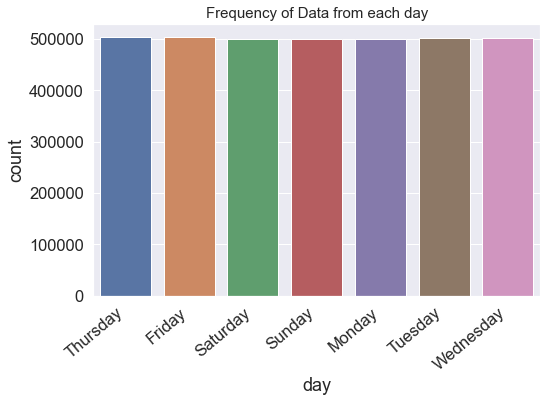

In [21]:
plt.figure(figsize=(8,5))
ax = sns.countplot('day', data=energy_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Frequency of Data from each day', fontsize=15)

### Bi-variate analysis

**Categorical & Continuous**

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='energy_mean', ylabel='year'>

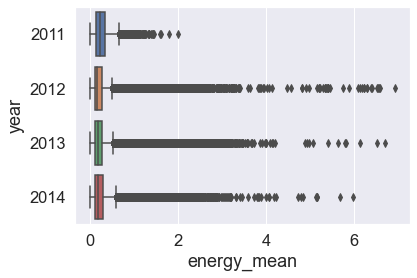

In [22]:
sns.boxplot(energy_data['energy_mean'], y=energy_data['year'], orient='h')

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='energy_mean', ylabel='month'>

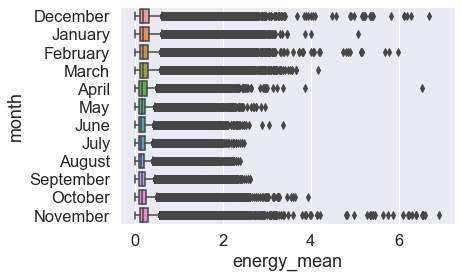

In [23]:
sns.boxplot(energy_data['energy_mean'], y=energy_data['month'], orient='h')

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='energy_mean', ylabel='day'>

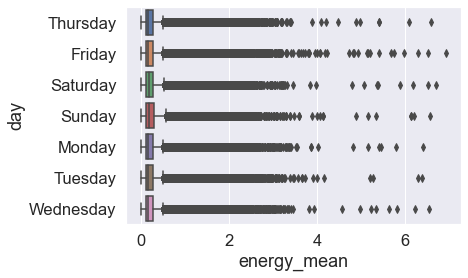

In [24]:
sns.boxplot(energy_data['energy_mean'], y=energy_data['day'], orient='h')

### Missing Value Treatment

In [25]:
nrows, ncols = energy_data.shape
print(f'Energy usage dataset contains {nrows} rows and {ncols} columns.')

Energy usage dataset contains 3510433 rows and 6 columns.


In [26]:
mv  = energy_data.isnull().sum().sum()
prop = round(((mv/energy_data.shape[0]) * 100),3)
print(f'Energy usage dataset contains {mv} missing values, which is {prop} % of whole data.')

Energy usage dataset contains 30 missing values, which is 0.001 % of whole data.


In [27]:
energy_data.isnull().sum()

LCLid           0
day             0
energy_mean    30
date            0
year            0
month           0
dtype: int64

In [28]:
# let's drop those records
energy_data.dropna(how='any', inplace=True)
nrows, ncols = energy_data.shape
print(f'Now the dataset contains {nrows} rows and {ncols} columns.')

Now the dataset contains 3510403 rows and 6 columns.


In [29]:
energy_data.isnull().sum().sum() # check for missing values

0

### Weather dataset

In [30]:
weather_data.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [31]:
weather_data.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [32]:
# drop unnecessary features
weather_data = weather_data.drop(['temperatureMax', 'temperatureMaxTime', 'windBearing', 
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase']
                               , axis=1)

In [33]:
weather_data.columns

Index(['icon', 'time'], dtype='object')

In [34]:
weather_data['date'] = pd.to_datetime(weather_data['time'])
weather_data['weather'] = weather_data['icon']

weather_data = weather_data.drop(['time'], axis=1)
weather_data = weather_data.drop(['icon'], axis=1)

In [35]:
weather_data.head(3)

,date,weather
0,2011-11-11,fog
1,2011-12-11,partly-cloudy-day
2,2011-12-27,partly-cloudy-day


In [36]:
weather_data['weather'].value_counts()

partly-cloudy-day      619
wind                   124
fog                     91
partly-cloudy-night     33
cloudy                   9
clear-day                6
Name: weather, dtype: int64

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of Data for each weather type')

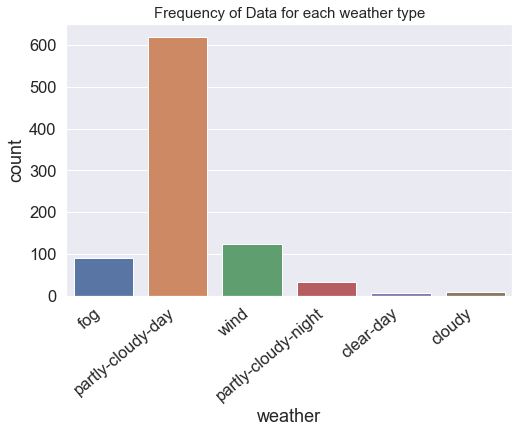

In [37]:
plt.figure(figsize=(8,5))
ax = sns.countplot('weather', data=weather_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Frequency of Data for each weather type', fontsize=15)

In [38]:
mv  = weather_data.isnull().sum().sum()
prop = round(((mv/weather_data.shape[0]) * 100),3)
print(f'Weather dataset contains {mv} missing values, which is {prop} % of whole data.')

Weather dataset contains 0 missing values, which is 0.0 % of whole data.


### Demographic data

In [39]:
demographic_data

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111


In [40]:
demographic_data.columns

Index(['LCLid', 'stdorToU', 'Acorn', 'Acorn_grouped', 'file'], dtype='object')

In [41]:
# drop unnecessary features
demographic_data = demographic_data.drop(['stdorToU', 'Acorn', 'file'], axis=1)

In [42]:
demographic_data.rename(columns={'Acorn_grouped': 'Demographic'}, inplace=True)

In [43]:
demographic_data['Demographic'].value_counts()

Affluent       2192
Adversity      1816
Comfortable    1507
ACORN-U          49
ACORN-            2
Name: Demographic, dtype: int64

In [44]:
mv  = demographic_data.isnull().sum().sum()
prop = round(((mv/demographic_data.shape[0]) * 100),3)
print(f'Demographic dataset contains {mv} missing values, which is {prop} % of whole data.')

Demographic dataset contains 0 missing values, which is 0.0 % of whole data.


In [45]:
merged_data = pd.merge(energy_data, weather_data, how='left', left_on=['date'], right_on=['date'])

In [46]:
merged_data = pd.merge(merged_data, demographic_data, how='left', left_on=['LCLid'], right_on=['LCLid'])

In [47]:
merged_data

,LCLid,day,energy_mean,date,year,month,weather,Demographic
0,MAC000131,Thursday,0.432045,2011-12-15,2011,December,wind,Affluent
1,MAC000131,Friday,0.296167,2011-12-16,2011,December,partly-cloudy-day,Affluent
2,MAC000131,Saturday,0.189812,2011-12-17,2011,December,partly-cloudy-day,Affluent
3,MAC000131,Sunday,0.218979,2011-12-18,2011,December,partly-cloudy-day,Affluent
4,MAC000131,Monday,0.325979,2011-12-19,2011,December,partly-cloudy-day,Affluent
...,...,...,...,...,...,...,...,...
3510398,MAC004977,Monday,0.118458,2014-02-24,2014,February,wind,Affluent
3510399,MAC004977,Tuesday,0.084208,2014-02-25,2014,February,partly-cloudy-day,Affluent
3510400,MAC004977,Wednesday,0.120500,2014-02-26,2014,February,partly-cloudy-day,Affluent
3510401,MAC004977,Thursday,0.114062,2014-02-27,2014,February,partly-cloudy-day,Affluent


/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of Data for each demographic')

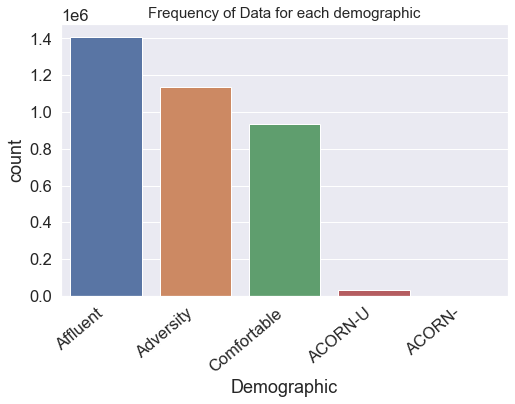

In [48]:
plt.figure(figsize=(8,5))
ax = sns.countplot('Demographic', data=merged_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Frequency of Data for each demographic', fontsize=15)

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of Data for each weather type')

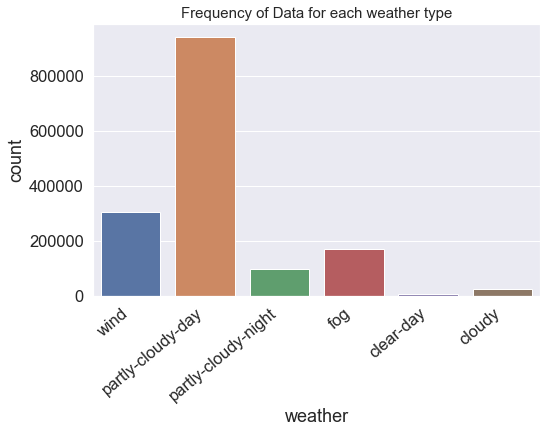

In [49]:
plt.figure(figsize=(8,5))
ax = sns.countplot('weather', data=merged_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Frequency of Data for each weather type', fontsize=15)

/home/chqdrian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='energy_mean', ylabel='weather'>

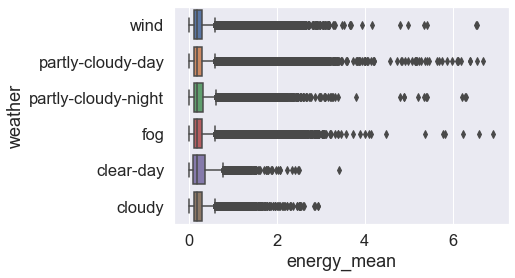

In [50]:
sns.boxplot(merged_data['energy_mean'], y=merged_data['weather'], orient='h')

In [51]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510403 entries, 0 to 3510402
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   LCLid        object        
 1   day          object        
 2   energy_mean  float64       
 3   date         datetime64[ns]
 4   year         int64         
 5   month        object        
 6   weather      object        
 7   Demographic  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 241.0+ MB


In [52]:
mv  = merged_data.isnull().sum().sum()
prop = round(((mv/merged_data.shape[0]) * 100),3)
print(f'Merged dataset contains {mv} missing values')

Merged dataset contains 1963480 missing values


In [53]:
merged_data.isnull().sum()

LCLid                0
day                  0
energy_mean          0
date                 0
year                 0
month                0
weather        1963480
Demographic          0
dtype: int64

In [54]:
# let's drop those records
merged_data.dropna(how='any', inplace=True)
nrows, ncols = merged_data.shape
print(f'Now the dataset contains {nrows} rows and {ncols} columns.')

Now the dataset contains 1546923 rows and 8 columns.


In [55]:
merged_data.isnull().sum().sum() # check for missing values

0

#### Encoding

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [57]:
merged_data.columns

Index(['LCLid', 'day', 'energy_mean', 'date', 'year', 'month', 'weather',
       'Demographic'],
      dtype='object')

In [58]:
ohe = OneHotEncoder()
demographic = pd.DataFrame(ohe.fit_transform(merged_data[['Demographic']]).toarray(), columns=['demo_'+loc for loc in sorted(list(merged_data['Demographic'].unique()))])
weather = pd.DataFrame(ohe.fit_transform(merged_data[['weather']]).toarray(), columns=['weather_'+loc for loc in sorted(list(merged_data['weather'].unique()))])
month = pd.DataFrame(ohe.fit_transform(merged_data[['month']]).toarray(), columns=sorted(list(merged_data['month'].unique())))
year = pd.DataFrame(ohe.fit_transform(merged_data[['year']]).toarray(), columns=sorted(list(merged_data['year'].unique())))
day = pd.DataFrame(ohe.fit_transform(merged_data[['day']]).toarray(), columns=sorted(list(merged_data['day'].unique())))


In [59]:
energy = pd.concat([merged_data, demographic, weather, month, year, day], axis=1)
energy.drop(['Demographic', 'weather', 'month', 'year', 'day'], axis=1, inplace=True)

In [60]:
energy.columns

Index([                      'LCLid',                 'energy_mean',
                              'date',                 'demo_ACORN-',
                      'demo_ACORN-U',              'demo_Adversity',
                     'demo_Affluent',            'demo_Comfortable',
                 'weather_clear-day',              'weather_cloudy',
                       'weather_fog',   'weather_partly-cloudy-day',
       'weather_partly-cloudy-night',                'weather_wind',
                          'December',                    'February',
                           'January',                       'March',
                          'November',                     'October',
                                2011,                          2012,
                                2013,                          2014,
                            'Friday',                      'Monday',
                          'Saturday',                      'Sunday',
                          'Thursda

In [ ]:
# energy_le = merged_data.copy()

# lb = LabelEncoder()

# energy_le['Demographic'] = lb.fit_transform(merged_data['Demographic'])
# energy_le['weather'] = lb.fit_transform(merged_data['weather'])
# energy_le['month'] = lb.fit_transform(merged_data['month'])
# energy_le['year'] = lb.fit_transform(merged_data['year'])
# energy_le['day'] = lb.fit_transform(merged_data['day'])

In [ ]:
# energy_le.columns

In [ ]:
# energy_leX = energy_le.drop(['day', 'year', 'month', 'weather', 'Demographic'], axis=1)
# energy_ley = energy_le['energy_mean'].copy()

In [61]:
energy.shape

(2415222, 31)

In [68]:
energy_X = energy.drop(['energy_mean', 'date', 'LCLid'], axis=1)
energy_y = energy['energy_mean'].copy()

## Base Model

In [69]:
import statsmodels.api as sm

In [75]:
x_constant = sm.add_constant(energy_X)
energy_model = sm.OLS(energy_X, x_constant).fit()
energy_model.summary()